In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

***
### Read Data File (Wav2Vec)

In [2]:
cols = list(pd.read_csv("net_aigenerated_data_wav2vec_performance_stu.csv", nrows=1))
print(cols)

net_aigenerated_data_wav2vec = pd.read_csv('/projectnb/ds549/projects/AImpower/wav2vec-evals/net_aigenerated_data_wav2vec_performance_stu.csv', delimiter=',', usecols =[i for i in cols if "Unnamed:" not in i])


['Unnamed: 0', 'Filename', 'Start_time', 'End_time', 'Wav2vec', 'WER', 'Stutterance_Count', 'NA_Count', 'NA_Cleaned_Count', 'WER_Binned', 'rouge1-precision', 'rouge1-recall', 'rouge1-f1', 'rouge2-precision', 'rouge2-recall', 'rouge2-f1', 'rougel-precision', 'rougel-recall', 'rougel-f1', 'Cleaned_Transcript', 'GroundTruth_Transcript', 'Duration', 'Freq_Duration', 'Freq_CharCount']


In [3]:
net_aigenerated_data_wav2vec = net_aigenerated_data_wav2vec.assign(Duration=net_aigenerated_data_wav2vec['End_time']-net_aigenerated_data_wav2vec['Start_time'])
net_aigenerated_data_wav2vec = net_aigenerated_data_wav2vec.assign(Freq_Duration=net_aigenerated_data_wav2vec["Stutterance_Count"]/net_aigenerated_data_wav2vec["Duration"])
net_aigenerated_data_wav2vec = net_aigenerated_data_wav2vec.assign(Freq_CharCount=net_aigenerated_data_wav2vec["Stutterance_Count"]/net_aigenerated_data_wav2vec["GroundTruth_Transcript"].str.len())


In [4]:
net_aigenerated_data_wav2vec

,Filename,Start_time,End_time,Wav2vec,WER,Stutterance_Count,NA_Count,NA_Cleaned_Count,WER_Binned,rouge1-precision,...,rouge2-recall,rouge2-f1,rougel-precision,rougel-recall,rougel-f1,Cleaned_Transcript,GroundTruth_Transcript,Duration,Freq_Duration,Freq_CharCount
0,D0001_A,2081.540000,2109.650000,我说出了就比较需要时间然后那识别了他的不就是他的一会那个话还没说完的描说出来的话它就取消不就...,0.350515,1.0,589,0,0.35,0.722222,...,0.278689,0.309091,0.648148,0.500000,0.564516,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,我说出来就比较的需要时间，哦，然后那个嗯/i识别的它的就是它等你一会儿，你那个话还没有说完，...,28.110000,0.035575,0.010101
1,D0001_A,790.130000,796.580000,四治表我尔说的法,0.700000,1.0,589,0,0.70,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,电视剧有，我说的话。,电视剧有，我/r说的话。,6.450000,0.155039,0.083333
2,D0001_A,1562.083518,1586.220000,这部剧是不怎么评中不怎么好的就而论区的那那县人他们都在说拿号作朝惨的那个就那么请奋但是就是了...,0.375000,10.0,589,0,0.38,0.566667,...,0.300000,0.324324,0.600000,0.500000,0.545455,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,这/b部剧是不怎么，评分是不怎么好的，呃/i就因为呃/i评/r/b论区的那[那]些人，他们都...,24.136482,0.414311,0.117647
3,D0001_A,2016.780000,2035.673559,很金转和训非女婴还是讯本一助手来的就就我记的他是叫迅菲我之前甲就是他,0.578947,7.0,589,0,0.58,0.476190,...,0.178571,0.192308,0.440000,0.354839,0.392857,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,很[很/b]精准，对，呃/i讯飞语音还是讯飞助手来着，就[就]我记得它是叫讯/r飞，我之前就...,18.893559,0.370497,0.129630
4,D0001_A,1682.670000,1709.110000,一个那个是你较扎来的果望了是出现了与一个人然后了他他就这了一把健然后就交瓦那个拿二奥给早萨尔...,0.455882,8.0,589,0,0.46,0.500000,...,0.159091,0.168675,0.550000,0.448980,0.494382,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,一个那个是嗯/i叫啥来着，我忘了，就是出现了另/r/b一个人，然后呢他[他]就射/p了一把剑...,26.440000,0.302572,0.093023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,P0070,2586.616000,2589.346000,单曲循环歌曲这样而已,0.090909,0.0,589,0,0.09,1.000000,...,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲这样而已。,单曲循环歌曲这样而已。,2.730000,0.000000,0.000000
37249,P0070,2782.496000,2783.706000,杨幂的电影,0.166667,0.0,589,0,0.17,1.000000,...,0.666667,0.800000,1.000000,0.750000,0.857143,杨幂的电影。,杨幂的电影。,1.210000,0.000000,0.000000
37250,P0070,2995.296000,2998.116000,你好米亚今天柴油价怎么样,0.266667,0.0,589,0,0.27,0.833333,...,0.375000,0.461538,0.833333,0.555556,0.666667,你好，米雅，今天柴油价怎么样。,你好，米雅，今天柴油价怎么样。,2.820000,0.000000,0.000000
37251,P0070,2604.066000,2606.656000,单曲循环歌曲刘离光之歌,0.250000,0.0,589,0,0.25,0.800000,...,0.400000,0.444444,0.800000,0.666667,0.727273,单曲循环歌曲琉璃光之歌。,单曲循环歌曲琉璃光之歌。,2.590000,0.000000,0.000000


In [5]:
## SAVING

net_aigenerated_data_wav2vec.to_csv('net_aigenerated_data_wav2vec_performance_stu.csv', sep=',')

# net_aigenerated_data_wav2vec

## Visualization (Wav2Vec)

### Frequency setup: stuttering count/second

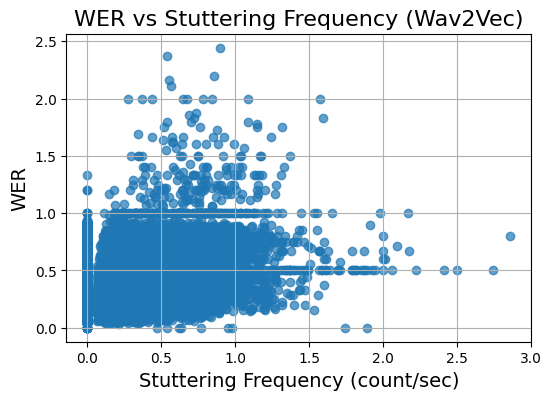

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/sec)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [7]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_Duration'], net_aigenerated_data_wav2vec.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 9.772500094800445e-110
rho = 0.11585492156847009


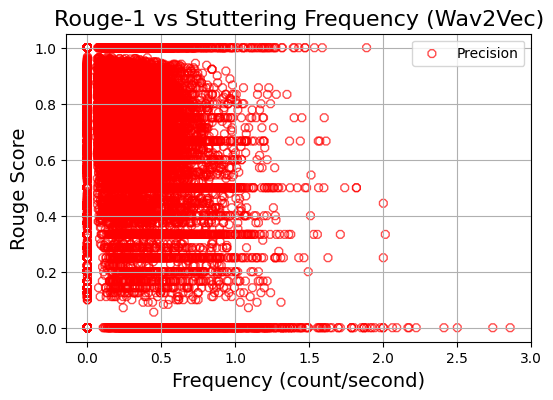

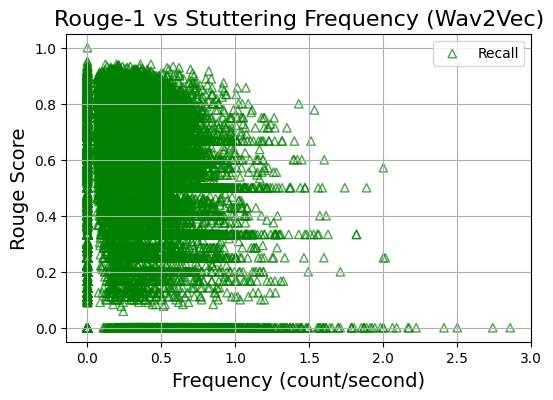

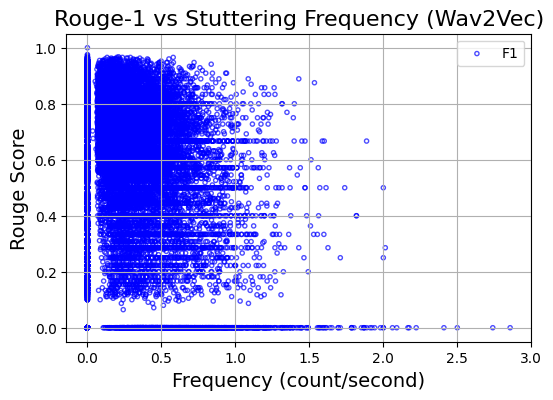

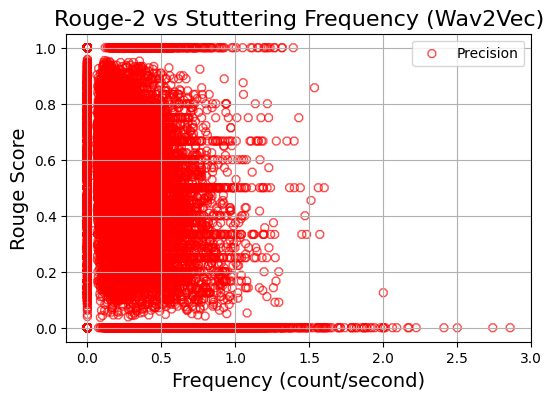

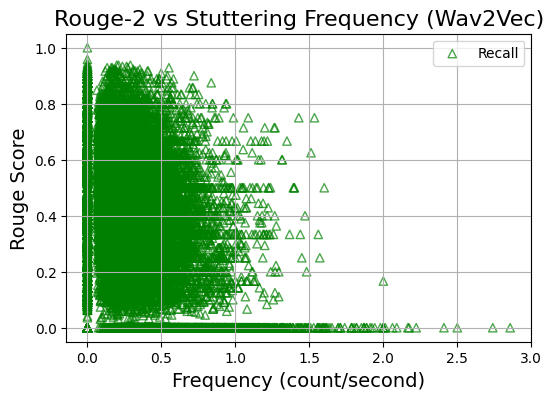

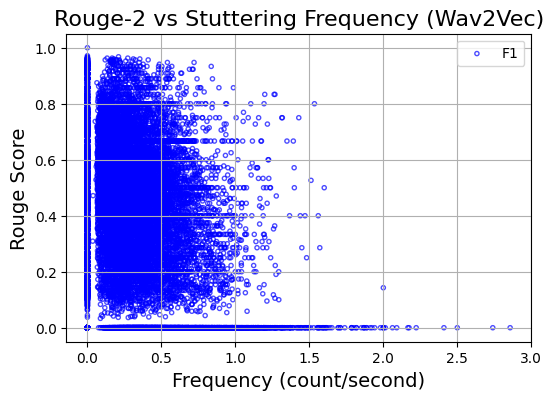

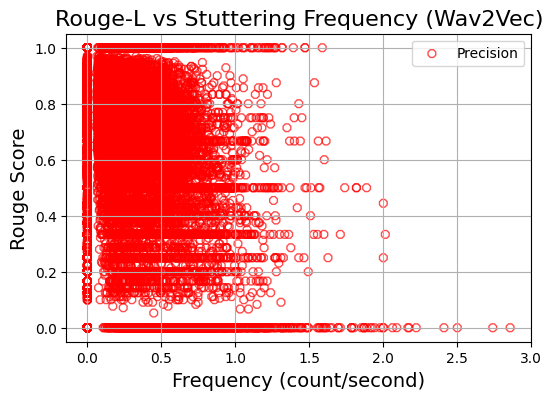

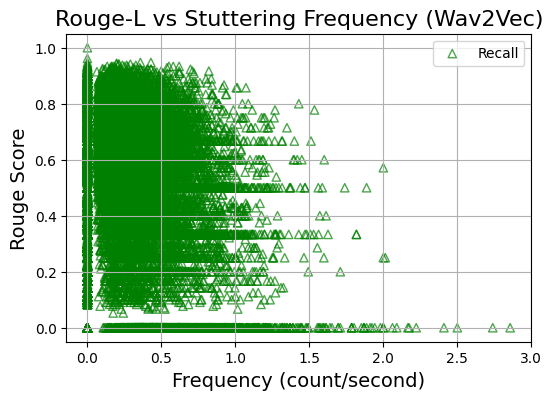

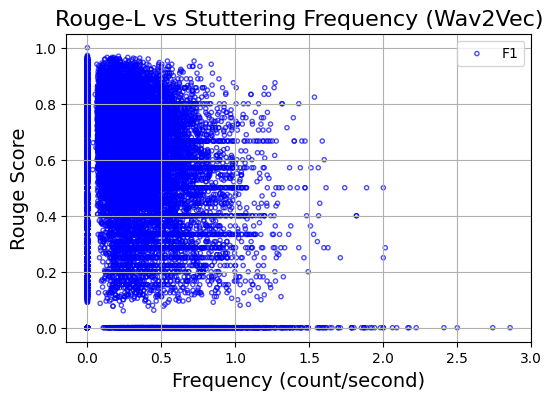

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_Duration"], 
    net_aigenerated_data_wav2vec["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/second)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_Duration'], net_aigenerated_data_wav2vec.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_Duration'], net_aigenerated_data_wav2vec.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_Duration'], net_aigenerated_data_wav2vec.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 1.696096581644632e-21
rho [stuttering count & rouge-1 f1] = 0.04970403577478986
p-value [stuttering count & rouge-2 f1] = 9.276504313269561e-21
rho [stuttering count & rouge-2 f1] = 0.04877514939740776
p-value [stuttering count & rouge-L f1] = 1.2744337791268036e-06
rho [stuttering count & rouge-L f1] = 0.025294857807099124


### Frequency Setup: Stuttering Count/Character

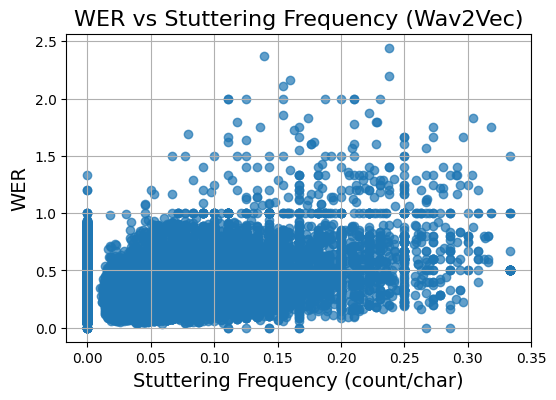

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/char)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [22]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_CharCount'], net_aigenerated_data_wav2vec.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 2.6955608211298723e-116
rho = 0.11930397730995324


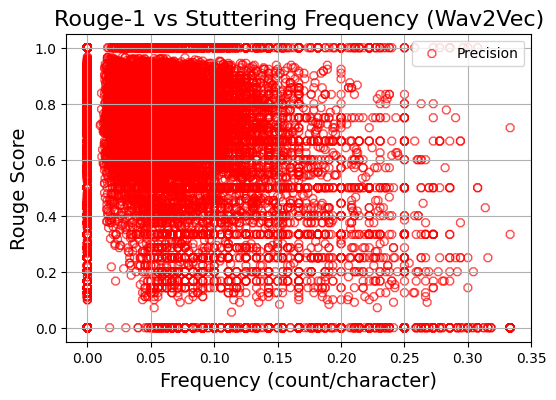

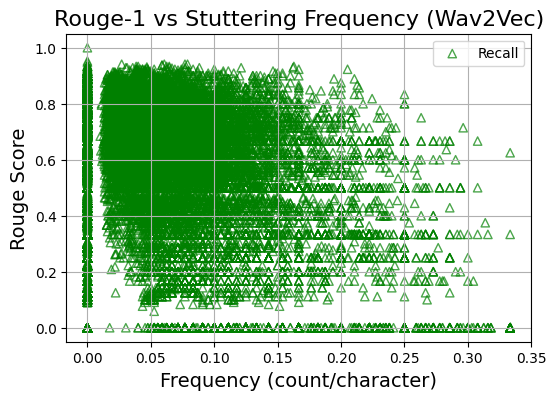

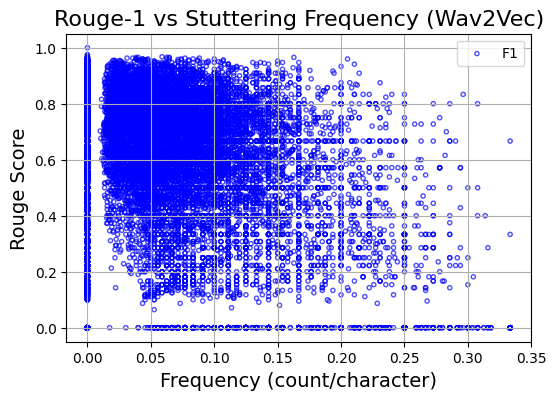

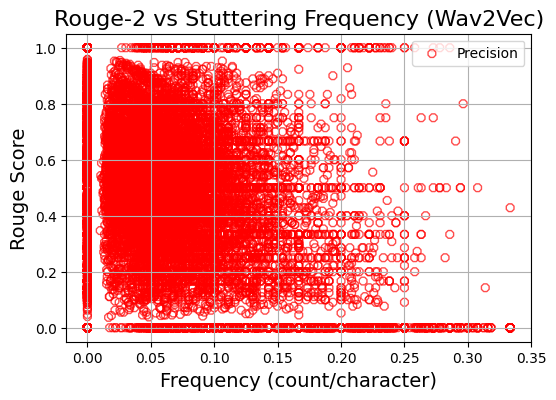

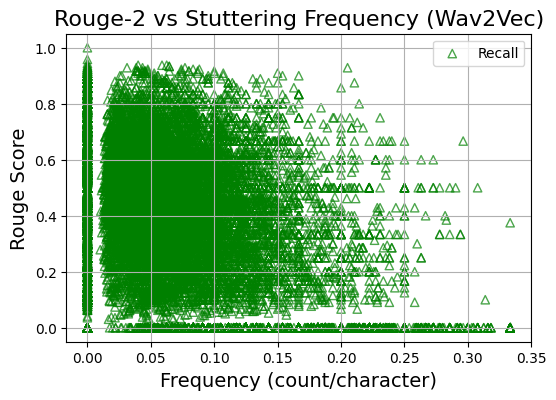

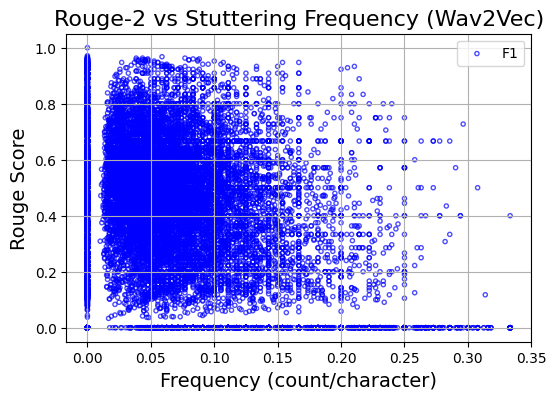

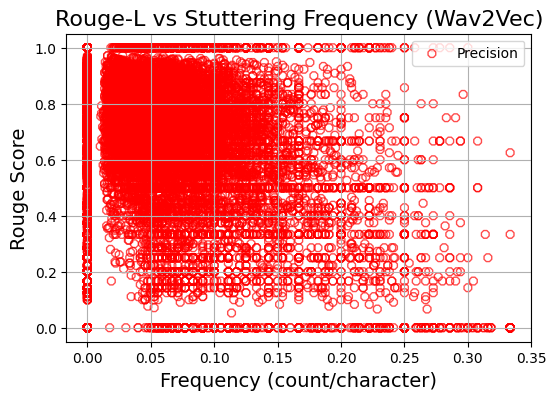

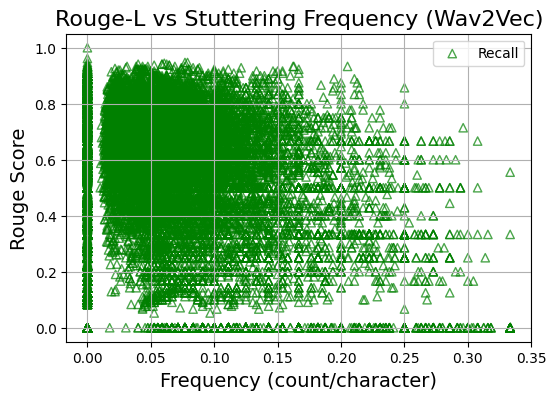

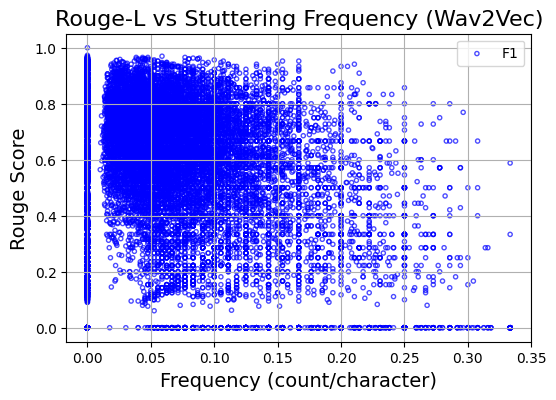

In [23]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wav2vec["Freq_CharCount"], 
    net_aigenerated_data_wav2vec["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (Wav2Vec)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [24]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_CharCount'], net_aigenerated_data_wav2vec.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_CharCount'], net_aigenerated_data_wav2vec.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wav2vec.dropna()['Freq_CharCount'], net_aigenerated_data_wav2vec.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 6.696591165265145e-13
rho [stuttering count & rouge-1 f1] = 0.03751699654651121
p-value [stuttering count & rouge-2 f1] = 1.3712055012383734e-12
rho [stuttering count & rouge-2 f1] = 0.037002736899754696
p-value [stuttering count & rouge-L f1] = 0.004538730775326319
rho [stuttering count & rouge-L f1] = 0.014822575193044354
